In [ ]:
# !mkdir data_faces && wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip 

In [3]:
# import zipfile

# with zipfile.ZipFile("celeba.zip","r") as zip_ref:
#     zip_ref.extractall("data_faces/")

In [1]:
import requests
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from skimage.io import imread
from sklearn.model_selection import train_test_split

In [2]:
import cv2, glob
import skimage
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
 
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
%matplotlib inline
from IPython.display import clear_output


In [3]:
WEIGHTS_FOLDER = './model/'
if not os.path.exists(WEIGHTS_FOLDER):
  os.makedirs(os.path.join(WEIGHTS_FOLDER,"AE"))
  os.makedirs(os.path.join(WEIGHTS_FOLDER,"VAE"))

In [4]:
import numpy as np
import cv2

def generate_random_block_mask(image, min_block_size=20, max_block_size=60):
    height, width, _ = image.shape
    mask = np.zeros((height, width), dtype=np.uint8)

    block_width = np.random.randint(min_block_size, max_block_size + 1)
    block_height = np.random.randint(min_block_size, max_block_size + 1)

    x1 = np.random.randint(0, width - block_width)
    y1 = np.random.randint(0, height - block_height)
    x2 = x1 + block_width
    y2 = y1 + block_height

    mask[y1:y2, x1:x2] = 1

    return mask

In [6]:
import os
import cv2
import random
import numpy as np

def preprocess_image(image, crop_size=(138, 138), scale_size=(128, 128), crop_start=(30, 40)):
    cropped_image = image[crop_start[1]:crop_start[1] + crop_size[1], crop_start[0]:crop_start[0] + crop_size[0]]
    scaled_image = cv2.resize(cropped_image, scale_size, interpolation=cv2.INTER_AREA)
    return scaled_image

def random_block_mask(image, block_size=(64, 64)):
    h, w, _ = image.shape
    x = random.randint(0, w - block_size[0])
    y = random.randint(0, h - block_size[1])
    mask = np.zeros_like(image)
    mask[y:y + block_size[1], x:x + block_size[0]] = 1
    masked_image = image.copy()
    noise = np.random.randint(0, 256, size=(block_size[1], block_size[0], 3), dtype=np.uint8)
    masked_image[y:y + block_size[1], x:x + block_size[0]] = noise
    return masked_image, mask

input_dir = "data_faces/img_align_celeba/"
output_dir = "preprocessed_images/"
masked_output_dir = "masked_images/"
mask_output_dir = "masks/"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

if not os.path.exists(masked_output_dir):
    os.makedirs(masked_output_dir)

if not os.path.exists(mask_output_dir):
    os.makedirs(mask_output_dir)

for file_name in os.listdir(input_dir):
    input_path = os.path.join(input_dir, file_name)
    output_path = os.path.join(output_dir, file_name)
    masked_output_path = os.path.join(masked_output_dir, file_name)
    mask_output_path = os.path.join(mask_output_dir, file_name)

    image = cv2.imread(input_path)

    if image is not None:
        preprocessed_image = preprocess_image(image)
        masked_image, mask = random_block_mask(preprocessed_image)
        
        cv2.imwrite(output_path, preprocessed_image)
        cv2.imwrite(masked_output_path, masked_image)
        cv2.imwrite(mask_output_path, mask * 255)
    else:
        print(f"Image {input_path} not found or not loaded correctly.")

In [8]:
def visualize_images(original_image, masked_image, mask):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
    axs[0].axis('off')
    axs[0].set_title('Original Image')

    axs[1].imshow(cv2.cvtColor(masked_image, cv2.COLOR_BGR2RGB))
    axs[1].axis('off')
    axs[1].set_title('Masked Image')

    axs[2].imshow(mask * 255, cmap='gray')
    axs[2].axis('off')
    axs[2].set_title('Mask')

    plt.show()


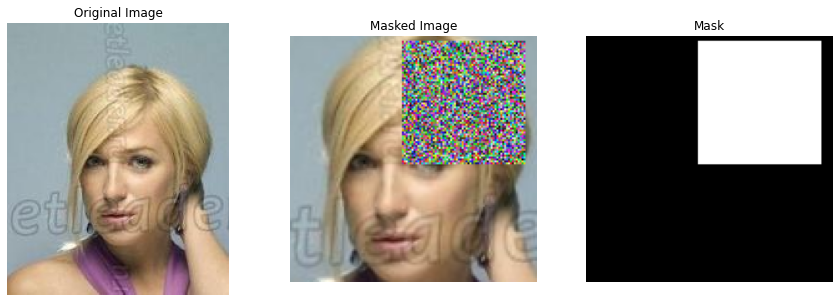

In [12]:
visualize_images(image, masked_image, mask)

In [14]:
pd.DataFrame(columns= ['val_gen_loss', 'val_disc_global_loss', 'val_disc_local_loss', 'val_psnr', 'val_ssim' ])

,val_gen_loss,val_disc_global_loss,val_disc_local_loss,val_psnr,val_ssim
